In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlibl inline

plt.style.use('bmh')

/Users/dorothyjeyson/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dorothyjeyson/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dorothyjeyson/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
UsageError: Line magic function `%matplotlibl` not found.


In [11]:
from io import StringIO
import requests

tractor=pd.read_csv("Tractor-Sales.csv")
tractor.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [12]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(tractor))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [13]:
import calendar
tractor['Month']=dates.month
tractor['Month']=tractor['Month'].apply(lambda x: calendar.month_abbr[x])
tractor['Year']=dates.year
tractor.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [14]:
tractor.set_index(dates,inplace=True)
tractor.head()

,Month-Year,Number of Tractor Sold,Month,Year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003


In [15]:
tractor.drop(['Month-Year'],axis=1, inplace=True)
tractor.rename(columns={'Number of Tractor Sold':'Tractor_sales'},inplace=True)
tractor=tractor[['Month','Year','Tractor_sales']]
tractor.head()

,Month,Year,Tractor_sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


Extracting the time series

In [16]:
sales_data=tractor['Tractor_sales']

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Years')

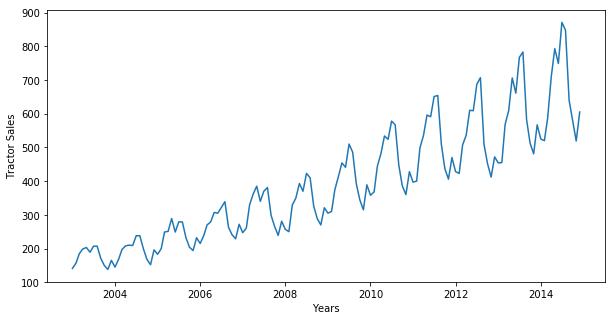

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sales_data)
plt.ylabel("Tractor Sales")
plt.xlabel("Years")

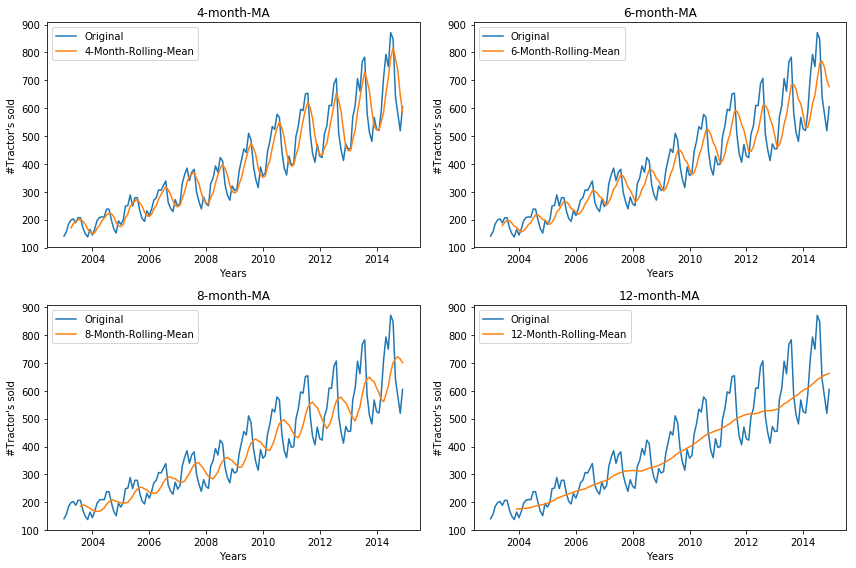

In [18]:
fig,axes = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_figheight(8)
fig.set_figwidth(12)

axes[0][0].plot(sales_data,label="Original")
axes[0][0].plot(sales_data.rolling(window=4).mean(),label="4-Month-Rolling-Mean")
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("#Tractor's sold")
axes[0][0].set_title("4-month-MA")
axes[0][0].legend(loc="best")

axes[0][1].plot(sales_data,label="Original")
axes[0][1].plot(sales_data.rolling(window=6).mean(),label="6-Month-Rolling-Mean")
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("#Tractor's sold")
axes[0][1].set_title("6-month-MA")
axes[0][1].legend(loc="best")

axes[1][0].plot(sales_data,label="Original")
axes[1][0].plot(sales_data.rolling(window=8).mean(),label="8-Month-Rolling-Mean")
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("#Tractor's sold")
axes[1][0].set_title("8-month-MA")
axes[1][0].legend(loc="best")

axes[1][1].plot(sales_data,label="Original")
axes[1][1].plot(sales_data.rolling(window=12).mean(),label="12-Month-Rolling-Mean")
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("#Tractor's sold")
axes[1][1].set_title("12-month-MA")
axes[1][1].legend(loc="best")

plt.tight_layout()
plt.show()

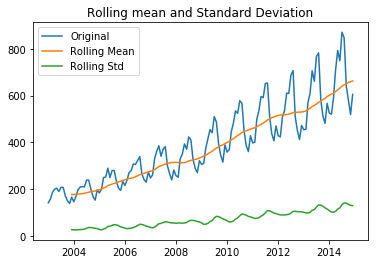

In [23]:
# Plot rolling statistics yearly
orig = plt.plot(sales_data,label="Original")
rollmean = plt.plot(sales_data.rolling(window=12).mean(),label="Rolling Mean")
rollstd = plt.plot(sales_data.rolling(window=12).std(),label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and Standard Deviation")
plt.show(block=True)

In [49]:
from statsmodels.tsa.stattools import adfuller
def adf_check(timeseries):
    print("##############################################")
    print("Results from ADF test for stationarity")
    result=adfuller(timeseries)
    labels=['ADF Test Statistic','P-value','#Lags Used','#Observations Used']
    for i,r in zip(labels,result):
        print(i+ " : " + str(r))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    print("##############################################")
adf_check(sales_data)

##############################################
Results from ADF test for stationarity
ADF Test Statistic : 1.1088250591467375
P-value : 0.995291241524842
#Lags Used : 14
#Observations Used : 129
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
##############################################


Seasonal Decomposition of the dataset

In [57]:
monthly_sales_data = pd.pivot_table(tractor, values="Tractor_sales", 
                                    columns=tractor["Year"],index=tractor["Month"])
monthly_sales_data = monthly_sales_data.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                      'Aug','Sep','Oct','Nov','Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


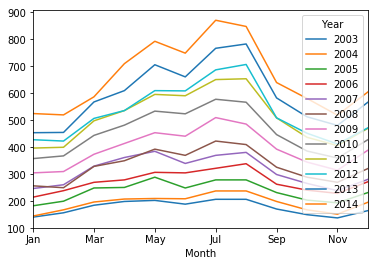

In [61]:
monthly_sales_data.plot()

In [62]:
yearly_sales_data = pd.pivot_table(tractor, values="Tractor_sales", 
                                    columns=tractor["Month"],index=tractor["Year"])
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


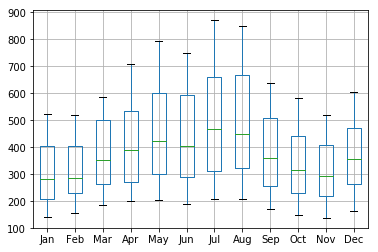

In [64]:
yearly_sales_data.boxplot()

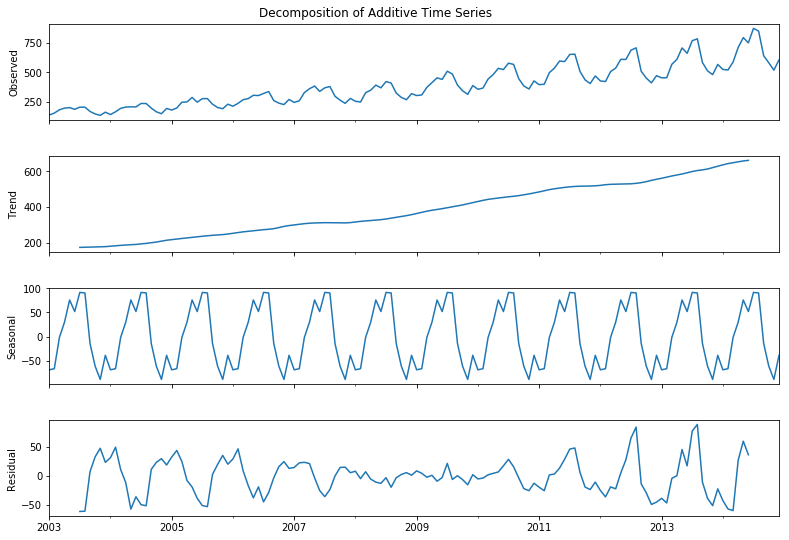

In [67]:
# decomposition= sm.tsa.seasonal_decompose(sales_data,model='multiplicative')
# fig = decomposition.plot()
# fig.set_figwidth(12)
# fig.set_figheight(8)
# fig.suptitle("Decomposition of Multiplicative Time Series")

decomposition= sm.tsa.seasonal_decompose(sales_data,model='additive')
fig = decomposition1.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle("Decomposition of Additive Time Series")

plt.show()

### ARIMA modelling

In [68]:
sales_log=np.log10(sales_data)
sales_log.dropna(inplace=True)

sales_log_diff = sales_log.diff(periods=1)
sales_log_diff.dropna(inplace=True)

adf_check(sales_log_diff)

##############################################
Results from ADF test for stationarity
ADF Test Statistic : -2.680467119996623
P-value : 0.07747972836508037
#Lags Used : 14
#Observations Used : 128
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
##############################################


In [69]:
sales_log_diff2 = sales_log.diff(periods=2)
sales_log_diff2.dropna(inplace=True)
adf_check(sales_log_diff2)

##############################################
Results from ADF test for stationarity
ADF Test Statistic : -3.200721566232421
P-value : 0.01994295010546021
#Lags Used : 11
#Observations Used : 130
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
##############################################


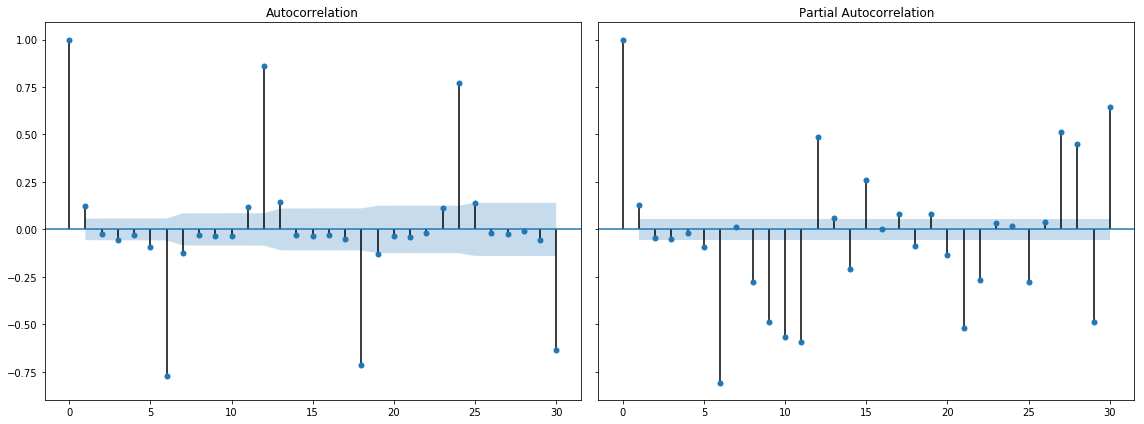

In [75]:
fig, axes = plt.subplots(1,2,sharex=False, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [76]:
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonl_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [78]:
import sys
warnings.filterwarnings("ignore")
best_aic=np.inf
best_pdq=None
best_seasonal_pdq=None
temp_model=None

for i in pdq:
    for j in seasonl_pdq:
        try:
            temp_model = sm.tsa.SARIMAX(sales_log,#sales_log_diff2,
                                       order=i,
                                       seasonal_order=j,
                                       enforce_invertibility=True,
                                       enforce_stationarity=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = i
                best_seasonal_pdq = j
        except:
            continue
print("Best SARIMAX parameters")
print("")
print("Order:", best_pdq)
print("")
print("Seasonal_order:", best_seasonal_pdq)
print("")
print("AIC :",best_aic)

Best SARIMAX parameters

Order: (0, 1, 1)

Seasonal_order: (1, 0, 1, 12)

AIC : -733.7743598431998


In [80]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [81]:
best_results.summary().tables[0]

Dep. Variable:,Tractor_sales,No. Observations:,144
Model:,"SARIMAX(0, 1, 1)x(1, 0, 1, 12)",Log Likelihood,370.887
Date:,"Fri, 10 Jan 2020",AIC,-733.774
Time:,18:20:12,BIC,-721.923
Sample:,01-01-2003,HQIC,-728.959
,- 12-01-2014,,
Covariance Type:,opg,,


In [82]:
best_results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,-0.3580,0.069,-5.205,0.000,-0.493,-0.223
ar.S.L12,0.9933,0.006,177.367,0.000,0.982,1.004
ma.S.L12,-0.5546,0.096,-5.750,0.000,-0.744,-0.366
sigma2,0.0003,2.73e-05,9.223,0.000,0.000,0.000


In [83]:
pred_2012 = best_results.get_prediction(start=pd.to_datetime('2012-01-01'),dynamic=True, full_results=True)
pred_2012_ci = pred_2012.conf_int()

In [87]:
sales_forecast = pred_2012.predicted_mean
sales_actual = sales_log['2012-01-01':]
mse = ((sales_actual - sales_forecast)** 2).mean()
print('MSE : {}'.format(round(mse,4)))

MSE : 0.0011


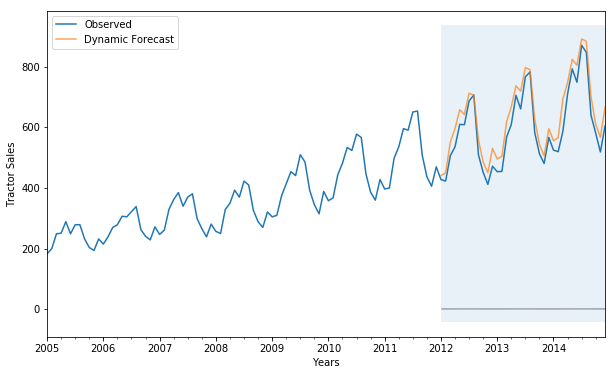

In [88]:
axis = sales_data['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, sales_forecast).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_2012_ci.index, pred_2012_ci.iloc[:, 0], pred_2012_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_data.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

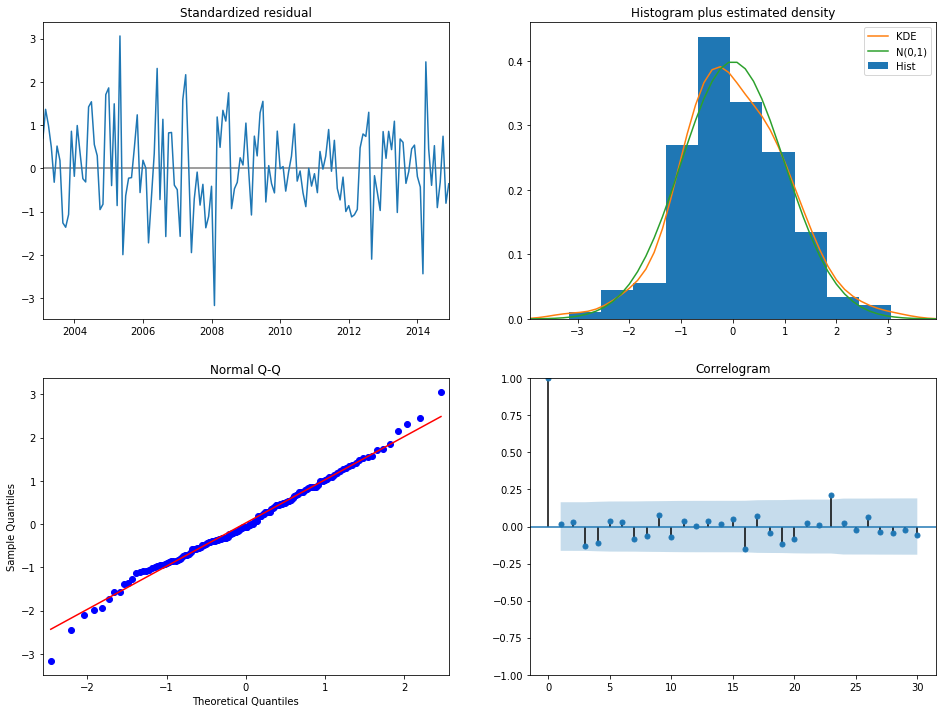

In [89]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [93]:
mkt_sales_data=pd.read_csv("Sales-and-Marketing.csv")
mkt_sales_data.set_index(pd.date_range(start='2011-01-01',freq='MS',periods=len(mkt_sales_data)),inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'},inplace=True)
mkt_sales_data.head()

,Time Period,Tractor-Sales,Marketing Expense
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [95]:
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


Text(0, 0.5, 'Monthly Tractor Sales')

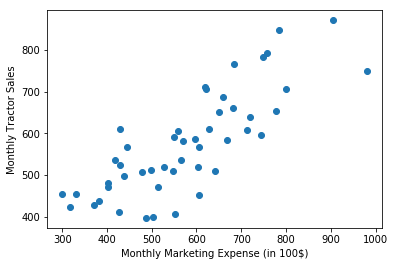

In [96]:
plt.figure()
plt.scatter(mkt_sales_data['Marketing Expense'],mkt_sales_data['Tractor-Sales'])
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')

In [97]:
print('Correlation for marketing data {}'.format(round(mkt_sales_data.corr()['Marketing Expense']['Tractor-Sales'],2)))

Correlation for marketing data 0.8


Text(0, 0.5, 'Differenced Tractor Sales')

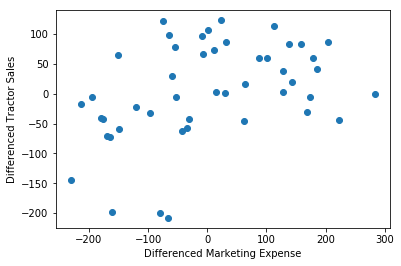

In [98]:
mkt_sales_data_diff=mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

plt.figure()
plt.scatter(mkt_sales_data_diff['Marketing Expense'],mkt_sales_data_diff['Tractor-Sales'])
plt.xlabel('Differenced Marketing Expense')
plt.ylabel('Differenced Tractor Sales')

In [99]:
print('Correlation for marketing data {}'.format(round(mkt_sales_data_diff.corr()['Marketing Expense']['Tractor-Sales'],2)))

Correlation for marketing data 0.41


In [100]:
clip_length = len(mkt_sales_data_diff)
clip_length

47

In [101]:
lagged_mkt_sales_diff = pd.DataFrame(np.column_stack((\
                            mkt_sales_data_diff['Marketing Expense'],\
                            mkt_sales_data_diff['Marketing Expense'].shift(periods=1)[0:clip_length],\
                            mkt_sales_data_diff['Marketing Expense'].shift(periods=2)[0:clip_length],\
                            mkt_sales_data_diff['Marketing Expense'].shift(periods=3)[0:clip_length],\
                            mkt_sales_data_diff['Tractor-Sales'][:47].values)),\
                        columns=['Diff_Mkt_Exp','Diff_Mkt_Exp_Lag1','Diff_Mkt_Exp_Lag2','Diff_Mkt_Exp_Lag3','Diff_Sales'])
lagged_mkt_sales_diff.set_index(mkt_sales_data_diff.index,inplace=True)
lagged_mkt_sales_diff.head()

,Diff_Mkt_Exp,Diff_Mkt_Exp_Lag1,Diff_Mkt_Exp_Lag2,Diff_Mkt_Exp_Lag3,Diff_Sales
2011-02-01,15.16,NaN,NaN,NaN,3.0
2011-03-01,-64.71,15.16,NaN,NaN,98.0
2011-04-01,128.07,-64.71,15.16,NaN,38.0
2011-05-01,178.99,128.07,-64.71,15.16,60.0
2011-06-01,-195.41,178.99,128.07,-64.71,-5.0


In [102]:
import sys
def auto_arima(timeseries, regressors=None, p=range(0,2), d=range(0,2), q=range(0,2)):
    pdq=list(itertools.product(p,d,q))
    seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
    warnings.filterwarnings("ignore")
    best_aic=np.inf
    best_pdq=None
    best_seasonal_pdq=None
    best_results=None
    for i in pdq:
        for j in seasonal_pdq:
            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                       exog=regressors,
                                                       order=i,
                                                       seasonal_order=j,
                                                       enforce_invertibility=True,
                                                       enforce_stationarity=True)
                temp_results = temp_model.fit()
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = i
                    best_seasonal_pdq = j
                    best_results = temp_results
            except:
                continue
    print('Best SARIMAX parameters {} x{} AIC: {}'.format(best_pdq,best_seasonal_pdq,best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [115]:
timeseries = lagged_mkt_sales_diff['Diff_Sales'][3:47]
regressors = lagged_mkt_sales_diff['Diff_Mkt_Exp'][3:47]
auto_arima(timeseries,regressors,p=range(0,3),q=range(0,3),d=range(0,3))

Best SARIMAX parameters (0, 1, 2) x(1, 2, 0, 12) AIC: 193.6999402783767
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 2)x(1, 2, 0, 12)   Log Likelihood                 -91.850
Date:                            Fri, 10 Jan 2020   AIC                            193.700
Time:                                    20:33:09   BIC                            198.422
Sample:                                05-01-2011   HQIC                           194.499
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Diff_Mkt_Exp    -0.0136      0.038    

In [116]:
#timeseries = lagged_mkt_sales_diff['Diff_Sales']
regressors = lagged_mkt_sales_diff[['Diff_Mkt_Exp','Diff_Mkt_Exp_Lag1']][3:47]
auto_arima(timeseries,regressors,p=range(0,3),d=range(0,3),q=range(0,3))

Best SARIMAX parameters (0, 1, 2) x(1, 2, 0, 12) AIC: 194.81773134874416
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 2)x(1, 2, 0, 12)   Log Likelihood                 -91.409
Date:                            Fri, 10 Jan 2020   AIC                            194.818
Time:                                    20:34:14   BIC                            200.484
Sample:                                05-01-2011   HQIC                           195.777
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Diff_Mkt_Exp         -0.002

In [117]:
regressors = lagged_mkt_sales_diff[['Diff_Mkt_Exp','Diff_Mkt_Exp_Lag1','Diff_Mkt_Exp_Lag2']][3:47]
auto_arima(timeseries,regressors,p=range(0,3),d=range(0,3),q=range(0,3))

Best SARIMAX parameters (0, 1, 2) x(1, 2, 0, 12) AIC: 193.2384342492733
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 2)x(1, 2, 0, 12)   Log Likelihood                 -89.619
Date:                            Fri, 10 Jan 2020   AIC                            193.238
Time:                                    20:35:25   BIC                            199.850
Sample:                                05-01-2011   HQIC                           194.357
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Diff_Mkt_Exp          0.0085

In [118]:
regressors = lagged_mkt_sales_diff[['Diff_Mkt_Exp','Diff_Mkt_Exp_Lag1','Diff_Mkt_Exp_Lag2','Diff_Mkt_Exp_Lag3']][3:47]
auto_arima(timeseries,regressors,p=range(0,3),d=range(0,3),q=range(0,3))

Best SARIMAX parameters (1, 1, 1) x(1, 2, 0, 12) AIC: 187.02660865120916
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 2, 0, 12)   Log Likelihood                 -85.513
Date:                            Fri, 10 Jan 2020   AIC                            187.027
Time:                                    20:36:45   BIC                            194.582
Sample:                                05-01-2011   HQIC                           188.305
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Diff_Mkt_Exp         -0.051

### As the AIC values, don't seem to be decreasing rapidly, the marketing expense has no influence over tractor sales